
# E-commerce Sales Analysis (Jupyter Project)

This notebook showcases a complete **data analysis project** suitable for a single analyst role (Tamheer Data Analyst).  
It includes: data loading, cleaning, exploratory analysis, KPIs, and simple insights.  
Data is synthetic and provided in `ecommerce_sales_2024.csv`.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Ensure plots show inline
%matplotlib inline

# Read data
df = pd.read_csv('ecommerce_sales_2024.csv', parse_dates=['order_date'])
df.head()


,order_id,order_date,city,category,product,unit_price,quantity,discount_pct,payment_method,channel,gross,discount_amount,net_revenue,month
0,ORD100000,2024-04-12,Jeddah,Electronics,Laptop Sleeve,239.92,1,0,STC Pay,Website,239.92,0.000,239.920,2024-04
1,ORD100001,2024-12-14,Makkah,Sports,Jump Rope,106.46,3,0,Apple Pay,Mobile App,319.38,0.000,319.380,2024-12
2,ORD100002,2024-09-27,Madinah,Beauty,Body Lotion,73.97,3,0,Credit Card,Website,221.91,0.000,221.910,2024-09
3,ORD100003,2024-04-16,Riyadh,Fashion,Abaya,130.13,1,0,Apple Pay,Website,130.13,0.000,130.130,2024-04
4,ORD100004,2024-03-12,Madinah,Grocery,Milk,37.74,3,15,STC Pay,Marketplace,113.22,16.983,96.237,2024-03


In [2]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_id         2500 non-null   object        
 1   order_date       2500 non-null   datetime64[ns]
 2   city             2500 non-null   object        
 3   category         2500 non-null   object        
 4   product          2500 non-null   object        
 5   unit_price       2500 non-null   float64       
 6   quantity         2500 non-null   int64         
 7   discount_pct     2500 non-null   int64         
 8   payment_method   2500 non-null   object        
 9   channel          2500 non-null   object        
 10  gross            2500 non-null   float64       
 11  discount_amount  2500 non-null   float64       
 12  net_revenue      2500 non-null   float64       
 13  month            2500 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(

## 1) Cleaning & Feature Engineering

In [3]:

# Handle duplicates
df = df.drop_duplicates(subset=['order_id'])

# Ensure non-negative prices/quantities
df = df[(df['unit_price'] >= 0) & (df['quantity'] > 0)]

# Feature engineering
df['month'] = df['order_date'].dt.to_period('M').astype(str)
df['gross'] = df['unit_price'] * df['quantity']
df['discount_amount'] = (df['discount_pct'] / 100.0) * df['gross']
df['net_revenue'] = df['gross'] - df['discount_amount']

df.describe(include='all')


,order_id,order_date,city,category,product,unit_price,quantity,discount_pct,payment_method,channel,gross,discount_amount,net_revenue,month
count,2500,2500,2500,2500,2500,2500.000000,2500.000000,2500.000000,2500,2500,2500.000000,2500.000000,2500.000000,2500
unique,2500,NaN,6,6,36,NaN,NaN,NaN,5,4,NaN,NaN,NaN,12
top,ORD102499,NaN,Abha,Fashion,Smartphone,NaN,NaN,NaN,STC Pay,Website,NaN,NaN,NaN,2024-08
freq,1,NaN,440,502,107,NaN,NaN,NaN,525,1134,NaN,NaN,NaN,232
mean,NaN,2024-07-01 11:12:11.520000,NaN,NaN,NaN,133.499276,1.932400,3.900000,NaN,NaN,261.573144,10.085142,251.488002,NaN
min,NaN,2024-01-01 00:00:00,NaN,NaN,NaN,10.000000,1.000000,0.000000,NaN,NaN,10.000000,0.000000,9.423000,NaN
25%,NaN,2024-04-05 00:00:00,NaN,NaN,NaN,56.475000,1.000000,0.000000,NaN,NaN,81.052500,0.000000,76.825000,NaN
50%,NaN,2024-06-28 00:00:00,NaN,NaN,NaN,96.810000,2.000000,0.000000,NaN,NaN,144.500000,0.000000,137.338000,NaN
75%,NaN,2024-10-03 00:00:00,NaN,NaN,NaN,142.520000,3.000000,10.000000,NaN,NaN,321.240000,10.095000,306.315750,NaN
max,NaN,2024-12-30 00:00:00,NaN,NaN,NaN,613.790000,7.000000,20.000000,NaN,NaN,2264.700000,329.776000,2218.320000,NaN


## 2) KPIs

In [4]:

total_orders = df['order_id'].nunique()
total_revenue = df['net_revenue'].sum()
avg_order_value = df.groupby('order_id')['net_revenue'].sum().mean()

print(f"Total Orders: {total_orders:,}")
print(f"Total Net Revenue: {total_revenue:,.2f}")
print(f"Average Order Value (AOV): {avg_order_value:,.2f}")


Total Orders: 2,500
Total Net Revenue: 628,720.01
Average Order Value (AOV): 251.49


## 3) Revenue Over Time

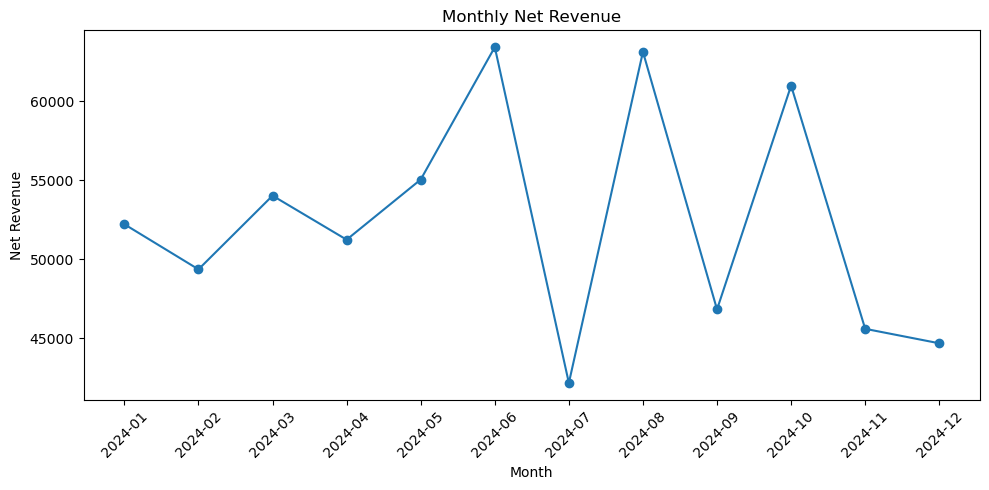

,month,net_revenue
0,2024-01,52216.5340
1,2024-02,49360.3255
2,2024-03,54026.4400
3,2024-04,51239.1660
4,2024-05,55047.9320


In [5]:

monthly_rev = df.groupby('month')['net_revenue'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_rev['month'], monthly_rev['net_revenue'], marker='o')
plt.title('Monthly Net Revenue')
plt.xlabel('Month')
plt.ylabel('Net Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

monthly_rev.head()


## 4) Top Products by Revenue

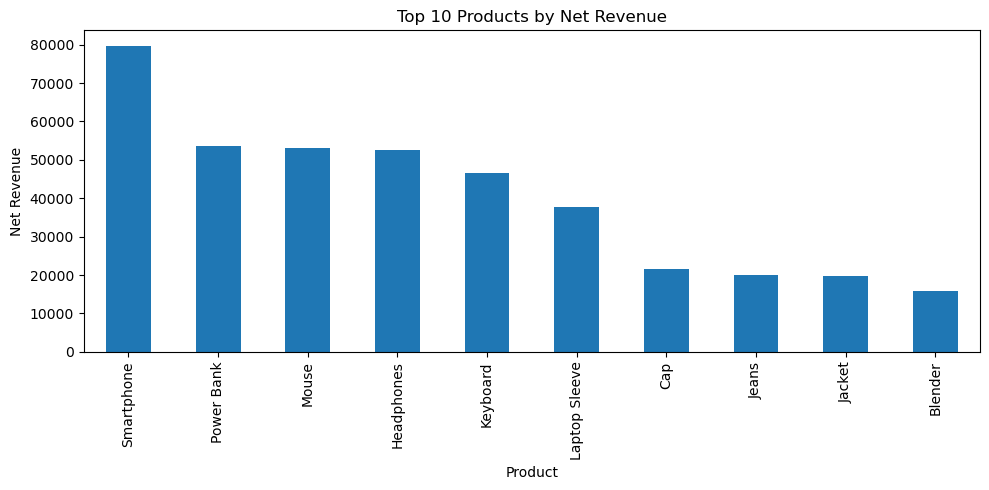

product
Smartphone       79735.7710
Power Bank       53664.5050
Mouse            53080.1185
Headphones       52628.7815
Keyboard         46681.0930
Laptop Sleeve    37595.3775
Cap              21651.3350
Jeans            19974.4060
Jacket           19648.4515
Blender          15855.1815
Name: net_revenue, dtype: float64

In [6]:

top_products = df.groupby('product')['net_revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind='bar')
plt.title('Top 10 Products by Net Revenue')
plt.xlabel('Product')
plt.ylabel('Net Revenue')
plt.tight_layout()
plt.show()

top_products


## 5) Revenue by City

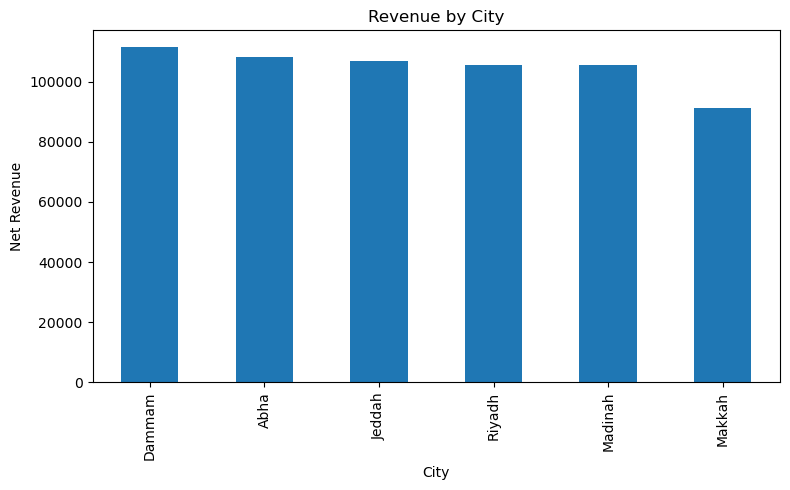

city
Dammam     111505.9115
Abha       108110.3190
Jeddah     106916.6520
Riyadh     105500.9855
Madinah    105454.5610
Makkah      91231.5760
Name: net_revenue, dtype: float64

In [7]:

city_rev = df.groupby('city')['net_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
city_rev.plot(kind='bar')
plt.title('Revenue by City')
plt.xlabel('City')
plt.ylabel('Net Revenue')
plt.tight_layout()
plt.show()

city_rev


## 6) Category Mix (Share of Revenue)

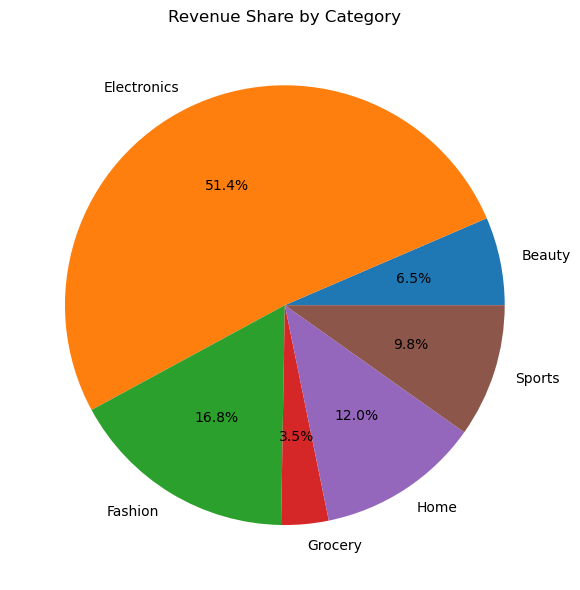

category
Electronics    323385.6465
Fashion        105756.3945
Home            75314.6090
Sports          61712.6755
Beauty          40683.7940
Grocery         21866.8855
Name: net_revenue, dtype: float64

In [8]:

cat_share = df.groupby('category')['net_revenue'].sum()

plt.figure(figsize=(6,6))
plt.pie(cat_share.values, labels=cat_share.index, autopct='%1.1f%%')
plt.title('Revenue Share by Category')
plt.tight_layout()
plt.show()

cat_share.sort_values(ascending=False)


## 7) Channel & Payment Method Performance

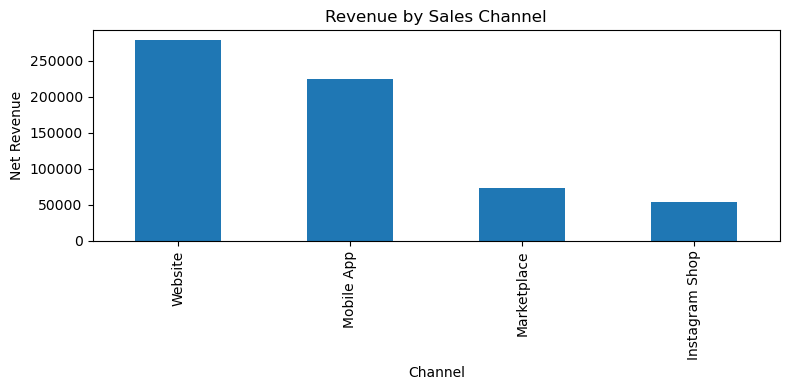

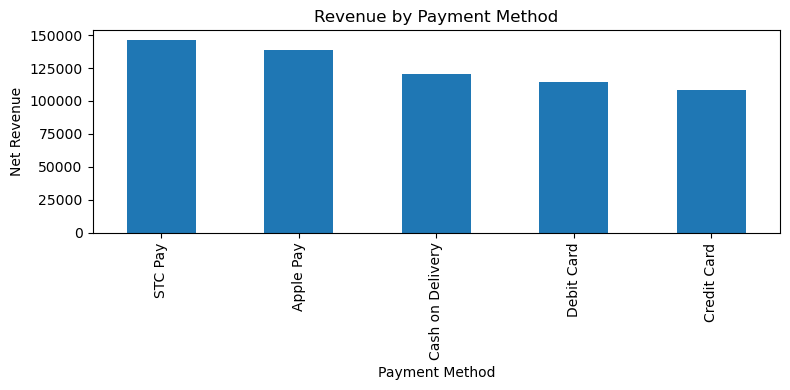

(channel
 Website           278029.2465
 Mobile App        224219.6165
 Marketplace        72475.1100
 Instagram Shop     53996.0320
 Name: net_revenue, dtype: float64,
 payment_method
 STC Pay             146277.6880
 Apple Pay           138568.9445
 Cash on Delivery    120785.3905
 Debit Card          114709.5075
 Credit Card         108378.4745
 Name: net_revenue, dtype: float64)

In [9]:

channel_rev = df.groupby('channel')['net_revenue'].sum().sort_values(ascending=False)
payment_rev = df.groupby('payment_method')['net_revenue'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,4))
channel_rev.plot(kind='bar')
plt.title('Revenue by Sales Channel')
plt.xlabel('Channel')
plt.ylabel('Net Revenue')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
payment_rev.plot(kind='bar')
plt.title('Revenue by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Net Revenue')
plt.tight_layout()
plt.show()

channel_rev, payment_rev


## 8) Simple Repeat Rate (Synthetic Customer IDs)

In [10]:

# Create synthetic customer ids to demonstrate repeat purchase behavior
np.random.seed(0)
df['customer_id'] = np.random.randint(1000, 2000, size=len(df))
orders_per_customer = df.groupby('customer_id')['order_id'].nunique()
repeat_rate = (orders_per_customer > 1).mean()

print(f'Repeat Purchase Rate: {repeat_rate*100:.1f}%')
orders_per_customer.describe()


Repeat Purchase Rate: 77.7%


count    921.000000
mean       2.714441
std        1.472907
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max       11.000000
Name: order_id, dtype: float64


## 9) Insights & Recommendations

- Identify top products and ensure inventory is aligned in high-demand months.
- Push marketing on channels with the highest revenue contribution.
- Consider targeted promotions in cities with lower revenue to grow share.
- Monitor AOV and experiment with bundles or cross-selling to increase it.
- Track seasonality (e.g., holiday/Ramadan peaks) to plan campaigns and stock. 
